# xray tutorial

[Stephan Hoyer](http://stephanhoyer.com), Unidata Users Workshop, 2015

-------------

This notebook introduces xray for new users.

For more information about xray:

- Reading the online documentation: http://xray.readthedocs.org/
- Check us out on GitHub: http://github.com/xray/xray/

In [2]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xray

%matplotlib inline

np.set_printoptions(precision=3, linewidth=100, edgeitems=2)  # make numpy less verbose

-------------------

## xray basics

#### Reading and writing netCDF

To start off, download this [example netCDF file](https://github.com/xray/xray-data/blob/master/ncep_temperature_north-america_2013-14.nc?raw=true) subset from the [NCEP/NCAR Reanalysis 1](http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html).

We'll open it up using `xray.open_dataset`. Under the covers, this uses the [netCDF4-Python](https://github.com/unidata/netcdf4-python) library:

In [110]:
ds = xray.open_dataset('/Users/shoyer/Downloads/ncep_temperature_north-america_2013-14.nc')

In [5]:
ds.air

<xray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision: 2
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Air temperature
    dataset: NMC Reanalysis
    level_desc: Surface
    statistic: Individual Obs
    parent_stat: Other
    actual_range: [ 185.16  322.1 ]

#### `xray.Dataset` is like a Python dictionary (of `xray.DataArray` objects)

In [6]:
'air' in ds

True

In [7]:
ds.keys()

[u'lat', u'time', u'lon', u'air']

In [8]:
ds['air'].identical(ds.air)

True

In [9]:
ds.dims

Frozen(SortedKeysDict({u'lat': 25, u'lon': 53, u'time': 2920}))

In [10]:
ds.attrs

OrderedDict([(u'Conventions', u'COARDS'), (u'title', u'4x daily NMC reanalysis (1948)'), (u'description', u'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'), (u'platform', u'Model'), (u'references', u'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html')])

In [11]:
ds.attrs['foo'] = 'bar'

In [12]:
ds

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
Data variables:
    air      (time, lat, lon) float64 241.2 242.5 243.5 244.0 244.1 243.9 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    foo: bar

In [13]:
ds.air.values

array([[[ 241.2,  242.5, ...,  235.5,  238.6],
        [ 243.8,  244.5, ...,  235.3,  239.3],
        ..., 
        [ 295.9,  296.2, ...,  295.9,  295.2],
        [ 296.3,  296.8, ...,  296.8,  296.6]],

       [[ 242.1,  242.7, ...,  233.6,  235.8],
        [ 243.6,  244.1, ...,  232.5,  235.7],
        ..., 
        [ 296.2,  296.7, ...,  295.5,  295.1],
        [ 296.3,  297.2, ...,  296.4,  296.6]],

       ..., 
       [[ 245.8,  244.8, ...,  244. ,  244.8],
        [ 249.9,  249.3, ...,  242.5,  244.3],
        ..., 
        [ 296.3,  297.2, ...,  295.1,  294.4],
        [ 297.8,  298.4, ...,  295.5,  295.2]],

       [[ 245.1,  244.3, ...,  241.5,  241.8],
        [ 249.9,  249.3, ...,  240.3,  241.7],
        ..., 
        [ 296.1,  296.9, ...,  295.7,  295.2],
        [ 297.7,  298.1, ...,  296.2,  295.7]]])

In [14]:
ds.air.dims

(u'time', u'lat', u'lon')

In [15]:
ds.air.attrs

OrderedDict([(u'long_name', u'4xDaily Air temperature at sigma level 995'), (u'units', u'degK'), (u'precision', 2), (u'GRIB_id', 11), (u'GRIB_name', u'TMP'), (u'var_desc', u'Air temperature'), (u'dataset', u'NMC Reanalysis'), (u'level_desc', u'Surface'), (u'statistic', u'Individual Obs'), (u'parent_stat', u'Other'), (u'actual_range', array([ 185.16,  322.1 ], dtype=float32))])

#### Saving back to netCDF

In [16]:
ds.to_netcdf('another-copy.nc', format='netcdf3_classic')

In [17]:
! ncdump -h another-copy.nc

netcdf another-copy {
dimensions:
	lat = 25 ;
	time = 2920 ;
	lon = 53 ;
variables:
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float air(time, lat, lon) ;
		air:long_name = "4xDaily Air temperature at sigma level 995" ;
		air:units = "degK" ;
		air:precision = 2s ;
		air:GRIB_id = 11s ;
		air:GRIB_name = "TMP" ;
		air:var_desc = "Air temperature" ;
		air:dataset = "NMC Reanalysis" ;
		air:level_desc = "Surface" ;
		air:statistic = "Individual Obs" ;
		air:parent_stat = "Other" ;
		air:actual_range = 185.16f, 322.1f ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time" ;
		time:units = "hours since 1800-01-01" ;
		time:calendar = "standard" ;

// global attributes:
		:Conventions = "COARDS" ;
		:title = "4x daily NMC reanalysis (1948)" 

### Indexing

#### By integer position

In [22]:
ds.air[0]

<xray.DataArray 'air' (lat: 25, lon: 53)>
array([[ 241.2,  242.5, ...,  235.5,  238.6],
       [ 243.8,  244.5, ...,  235.3,  239.3],
       ..., 
       [ 295.9,  296.2, ...,  295.9,  295.2],
       [ 296.3,  296.8, ...,  296.8,  296.6]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision: 2
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Air temperature
    dataset: NMC Reanalysis
    level_desc: Surface
    statistic: Individual Obs
    parent_stat: Other
    actual_range: [ 185.16  322.1 ]

#### By label along an axis (like pandas)

In [19]:
ds.air.loc['2013-01-01T00']

<xray.DataArray 'air' (lat: 25, lon: 53)>
array([[ 241.2,  242.5, ...,  235.5,  238.6],
       [ 243.8,  244.5, ...,  235.3,  239.3],
       ..., 
       [ 295.9,  296.2, ...,  295.9,  295.2],
       [ 296.3,  296.8, ...,  296.8,  296.6]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision: 2
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Air temperature
    dataset: NMC Reanalysis
    level_desc: Surface
    statistic: Individual Obs
    parent_stat: Other
    actual_range: [ 185.16  322.1 ]

#### With named dimensions

In [23]:
ds.air.sel(time='2013-01-01')

<xray.DataArray 'air' (time: 4, lat: 25, lon: 53)>
array([[[ 241.2,  242.5, ...,  235.5,  238.6],
        [ 243.8,  244.5, ...,  235.3,  239.3],
        ..., 
        [ 295.9,  296.2, ...,  295.9,  295.2],
        [ 296.3,  296.8, ...,  296.8,  296.6]],

       [[ 242.1,  242.7, ...,  233.6,  235.8],
        [ 243.6,  244.1, ...,  232.5,  235.7],
        ..., 
        [ 296.2,  296.7, ...,  295.5,  295.1],
        [ 296.3,  297.2, ...,  296.4,  296.6]],

       [[ 242.3,  242.2, ...,  236.1,  238.7],
        [ 244.6,  244.4, ...,  232. ,  235.7],
        ..., 
        [ 296.2,  296.5, ...,  296. ,  295.6],
        [ 296.4,  296.3, ...,  297. ,  296.8]],

       [[ 241.9,  241.8, ...,  235.5,  237.6],
        [ 246.3,  245.3, ...,  231.5,  234.5],
        ..., 
        [ 297. ,  297.5, ...,  296.6,  296.3],
        [ 297.5,  297.7, ...,  298. ,  297.9]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 

In [24]:
ds.air.sel(lat=slice(60, 50), lon=[260, 270, 280])

<xray.DataArray 'air' (time: 2920, lat: 5, lon: 3)>
array([[[ 247.7,  246.8,  253.4],
        [ 251.9,  249.5,  253.1],
        ..., 
        [ 253.3,  249.4,  256.6],
        [ 254.6,  252.3,  260. ]],

       [[ 246. ,  246.8,  251. ],
        [ 248.8,  248.9,  251.2],
        ..., 
        [ 254.6,  251.8,  252.9],
        [ 252.9,  252.1,  252.3]],

       ..., 
       [[ 260. ,  256.2,  251.7],
        [ 260. ,  257.2,  251.8],
        ..., 
        [ 261.2,  254.2,  250.8],
        [ 260.4,  254.6,  250.5]],

       [[ 255.5,  255.2,  253.1],
        [ 260.2,  259.5,  252.7],
        ..., 
        [ 262.4,  257.4,  256.4],
        [ 261.5,  258.7,  258.9]]])
Coordinates:
  * lat      (lat) float32 60.0 57.5 55.0 52.5 50.0
  * lon      (lon) float32 260.0 270.0 280.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    long_name: 4xDaily Air temperature at sigma level 995
    units: degK
    precision: 2
    GRIB_id: 11
    GRIB_name: TMP
    var_d

## Computation

You can do arithmetic directly on `Dataset` and `DataArray` objects. Labels are preserved, although attributes removed.

In [25]:
2 * ds

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 482.4 485.0 487.0 488.0 488.2 487.8 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    foo: bar

You can also apply NumPy "universal functions" like `np.sqrt` to `DataArray` objects:

In [26]:
np.sqrt(ds.air)

<xray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ 15.531,  15.572, ...,  15.346,  15.447],
        [ 15.614,  15.636, ...,  15.339,  15.469],
        ..., 
        [ 17.202,  17.21 , ...,  17.202,  17.181],
        [ 17.213,  17.228, ...,  17.228,  17.222]],

       [[ 15.56 ,  15.579, ...,  15.284,  15.356],
        [ 15.608,  15.624, ...,  15.248,  15.353],
        ..., 
        [ 17.21 ,  17.225, ...,  17.19 ,  17.178],
        [ 17.213,  17.239, ...,  17.216,  17.222]],

       ..., 
       [[ 15.678,  15.646, ...,  15.62 ,  15.646],
        [ 15.808,  15.789, ...,  15.572,  15.63 ],
        ..., 
        [ 17.213,  17.239, ...,  17.178,  17.158],
        [ 17.257,  17.274, ...,  17.19 ,  17.181]],

       [[ 15.656,  15.63 , ...,  15.54 ,  15.55 ],
        [ 15.808,  15.789, ...,  15.502,  15.547],
        ..., 
        [ 17.208,  17.231, ...,  17.196,  17.181],
        [ 17.254,  17.266, ...,  17.21 ,  17.196]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.

xray also implements standard aggregation functions:

In [27]:
ds.max()

<xray.Dataset>
Dimensions:  ()
Coordinates:
    *empty*
Data variables:
    air      float64 317.4

In [28]:
ds.mean(dim='time')

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
Data variables:
    air      (lat, lon) float64 260.4 260.2 259.9 259.5 259.0 258.6 258.2 ...

In [29]:
ds.median(dim=['lat', 'lon'])

<xray.Dataset>
Dimensions:  (time: 2920)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time) float64 277.5 276.7 276.2 276.8 277.0 275.3 275.6 275.4 ...

## Exercise

(a) Calculate the maximum air surface temperature over time in the vicinity of Boulder, CO (latitude=40, longitude=255)

(b) Convert the dataset from Kelvin to degrees Celsius and save to a new file. Don't forget to fix the temperature units! Recall `degC = degK - 273`.

----------------------

## Converting to pandas

[Pandas](http://pandas.pydata.org) is the best way to work with tabular data in Python. It's also a highly flexible data analysis tool, with way more functionality than xray.

The `pandas.DataFrame` is the work-horse pandas object, on which the `xray.Dataset` was based. The `pandas.Series` corresponds to the `xray.DataArray`

In [37]:
ds.to_dataframe().head()

air
lat lon time                           
75  200 2013-01-01 00:00:00  241.200012
        2013-01-01 06:00:00  242.100006
        2013-01-01 12:00:00  242.300018
        2013-01-01 18:00:00  241.899994
        2013-01-02 00:00:00  243.200012

Pandas provides very robust tools for reading and writing CSV:

In [38]:
print ds.to_dataframe().head(10).to_csv()

lat,lon,time,air
75.0,200.0,2013-01-01 00:00:00,241.200012207
75.0,200.0,2013-01-01 06:00:00,242.100006104
75.0,200.0,2013-01-01 12:00:00,242.300018311
75.0,200.0,2013-01-01 18:00:00,241.899993896
75.0,200.0,2013-01-02 00:00:00,243.200012207
75.0,200.0,2013-01-02 06:00:00,244.100006104
75.0,200.0,2013-01-02 12:00:00,243.300018311
75.0,200.0,2013-01-02 18:00:00,243.800018311
75.0,200.0,2013-01-03 00:00:00,244.800018311
75.0,200.0,2013-01-03 06:00:00,243.899993896



Of course, it's just as easy to convert back from pandas:

In [39]:
df = pd.DataFrame({'x': [1, 2, 3], 'y': ['a', 'b', 'c']}).set_index('x')

In [40]:
df

,y
x,
1,a
2,b
3,c


In [41]:
xray.Dataset.from_dataframe(df)

<xray.Dataset>
Dimensions:  (x: 3)
Coordinates:
  * x        (x) int64 1 2 3
Data variables:
    y        (x) object 'a' 'b' 'c'

### Things you can do with pandas

Lots of method we haven't implemented in xray yet:

In [42]:
ds.to_dataframe().describe()

,air
count,3869000.000000
mean,281.257526
std,16.320308
min,221.000000
25%,272.200012
50%,285.200012
75%,294.600006
max,317.400024


In [43]:
ds.to_dataframe().sample(10)

,,,air
lat,lon,time,
35.0,245.0,2013-08-15 12:00:00,298.100006
57.5,252.5,2014-04-01 18:00:00,260.200012
75.0,245.0,2013-07-19 00:00:00,281.299988
25.0,292.5,2013-08-01 06:00:00,300.299988
52.5,262.5,2013-05-16 00:00:00,287.900024
65.0,272.5,2014-11-22 06:00:00,232.299973
60.0,220.0,2013-03-08 12:00:00,271.299988
40.0,282.5,2014-01-10 00:00:00,270.100006
52.5,287.5,2013-02-17 06:00:00,258.799988


xray doesn't yet have plotting, so we export to pandas:

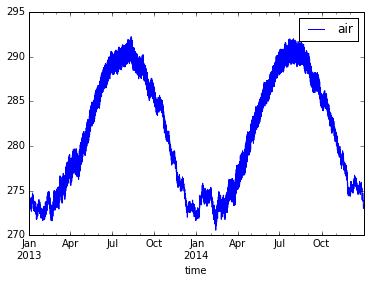

In [44]:
ds.mean(['lat', 'lon']).to_dataframe().plot()

We can also use matplotlib directly. This is useful for 2D plotting (not supported by pandas):

<matplotlib.colorbar.Colorbar instance at 0x11fb323f8>

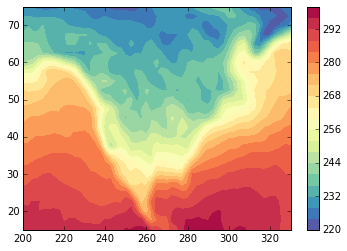

In [45]:
plt.contourf(ds.lon, ds.lat, ds.min('time').air, 20, cmap='Spectral_r')
plt.colorbar()

## Time series

Xray implements the "split-apply-combine" paradigm with `groupby`. This works really well for calculating climatologies:

In [46]:
ds.groupby('time.season').mean()

<xray.Dataset>
Dimensions:  (season: 4)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season) float64 273.7 289.2 279.0 283.0

In [47]:
clim = ds.groupby('time.month').mean('time')

In [48]:
clim

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, month: 12)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float64 246.4 246.4 246.2 245.8 245.2 244.6 ...

You can also do arithmetic with groupby objects, which repeats the arithmetic over each group:

In [49]:
anomalies = ds.groupby('time.month') - clim

In [52]:
anomalies

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
    month    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 -5.152 -3.888 -2.717 -1.814 -1.127 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    foo: bar

Resample adjusts a time series to a new resolution:

In [53]:
tmin = ds.air.resample('1D', dim='time', how='min')
tmax = ds.air.resample('1D', dim='time', how='max')

In [54]:
tmin

<xray.DataArray 'air' (time: 730, lat: 25, lon: 53)>
array([[[ 241.2,  241.8, ...,  233.6,  235.8],
        [ 243.6,  244.1, ...,  231.5,  234.5],
        ..., 
        [ 295.9,  296.2, ...,  295.5,  295.1],
        [ 296.3,  296.3, ...,  296.4,  296.6]],

       [[ 243.2,  243.1, ...,  238.8,  240.9],
        [ 246.4,  245.3, ...,  234.9,  237.2],
        ..., 
        [ 296.7,  296.3, ...,  296.4,  296.1],
        [ 297.5,  297.1, ...,  296.5,  296.9]],

       ..., 
       [[ 243.1,  243.4, ...,  245.6,  244.5],
        [ 247.7,  248.2, ...,  242.4,  244.2],
        ..., 
        [ 296.7,  297.4, ...,  296. ,  295.2],
        [ 297.8,  298.5, ...,  295.9,  295.5]],

       [[ 242.5,  242.4, ...,  241.5,  241.8],
        [ 248.4,  248.8, ...,  240.3,  241.7],
        ..., 
        [ 296.1,  296.9, ...,  295.1,  294.4],
        [ 297.7,  298.1, ...,  295.5,  295.2]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float

In [55]:
ds_extremes = xray.Dataset({'tmin': tmin, 'tmax': tmax})

In [56]:
ds_extremes

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 730)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 2013-01-03 ...
Data variables:
    tmax     (time, lat, lon) float64 242.3 242.7 243.5 244.0 244.1 243.9 ...
    tmin     (time, lat, lon) float64 241.2 241.8 241.8 242.1 242.6 243.3 ...

-------------------

## Exercises

(c) Calculate anomalies for `tmin`. Plot a 2D map of these anomalies for `2014-12-31`.

(d) Resample the original dataset to a monthly average, average across space and plot the time-series. (Hint: resampling uses `'1MS'` to indicate month-start.)

-------------------

## xray does (fast) automatic alignment

What happens if you multiple an array with dimensions `(time, latitude, longitude)` with an array with dimensions `(time,)`?

In [94]:
ds - ds.mean(['lat', 'lon'])

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 -32.97 -31.67 -30.67 -30.17 -30.07 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    foo: bar

Unlike with NumPy arrays, it works! Dimension names are paired up; mismatched dimensions are looped over, like broadcasting in NumPy.

Similarly, notice that `.T` transposes an array:

In [97]:
ds.air.T.dims

(u'lon', u'lat', u'time')

We can subtract an array from its transpose:

In [96]:
ds.air - ds.air.T

<xray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       ..., 
       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...

Finally, note that xray also aligns based on coordinate labels; the result has the intersection of the argument labels:

In [100]:
ds.sel(time='2014')

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 1460)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * time     (time) datetime64[ns] 2014-01-01 2014-01-01T06:00:00 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
Data variables:
    air      (time, lat, lon) float64 252.3 251.2 250.0 248.8 247.5 246.3 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    foo: bar

In [116]:
ds.sel(lat=[60, 55]) - ds.sel(time='2014-01')

<xray.Dataset>
Dimensions:  (lat: 2, lon: 53, time: 124)
Coordinates:
  * lat      (lat) float64 60.0 55.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2014-01-01 2014-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (1948)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html

## xray also works for data that doesn't fit in memory

Here's a quick demo of [how xray can leverage dask](http://xray.readthedocs.org/en/stable/dask.html) to work with data that doesn't fit in memory. This lets xray substitute for tools like `cdo` and `nco`.

Open a bunch of netCDF files from disk using `xray.open_mfdataset`:

In [148]:
ds = xray.open_mfdataset('/Users/shoyer/data/era-interim/2t/*.nc', engine='scipy')

In [149]:
ds

<xray.Dataset>
Dimensions:    (latitude: 256, longitude: 512, time: 52596)
Coordinates:
  * latitude   (latitude) float32 89.4628 88.767 88.067 87.3661 86.6648 ...
  * longitude  (longitude) float32 0.0 0.703125 1.40625 2.10938 2.8125 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-01-01T06:00:00 ...
Data variables:
    t2m        (time, latitude, longitude) float64 240.6 240.6 240.6 240.6 ...
Attributes:
    Conventions: CF-1.0
    history: 2015-01-24 09:20:12 GMT by grib_to_netcdf-1.12.3: grib_to_netcdf /data/data01/mars-web231-20150124092007-12207-11342.target -o /data/data01/mars-web231-20150124092011-12207-11343.nc

In [151]:
ds.nbytes * (2 ** -30)

51.363675981760025

In [153]:
%time float(ds.t2m.mean())

CPU times: user 2min 43s, sys: 1min 10s, total: 3min 53s
Wall time: 1min


278.64617415292236

For more details, read this blog post: http://continuum.io/blog/xray-dask